In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn import tree

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn import preprocessing 

In [7]:
data=pd.read_csv("D:\decision tree assignment\Fraud_check.csv")

In [8]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [14]:
data2=data.rename(columns={'Taxable.Income':'incometax','City.Population':'city population','Work.Experience':'work experience'})

In [15]:
data2

,Undergrad,Marital.Status,incometax,city population,work experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [21]:
 data2=pd.get_dummies(data2,columns=['Undergrad','Marital.Status','Urban'])

In [22]:
data2['high']=data2.incometax.map(lambda x:1 if x>30000 else 0)

In [23]:
data2

,incometax,city population,work experience,high,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,1,0,0,0,1,0,1
1,33700,134075,18,1,0,1,1,0,0,0,1
2,36925,160205,30,1,1,0,0,1,0,0,1
3,50190,193264,15,1,0,1,0,0,1,0,1
4,81002,27533,28,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,1,1,0,0,0,1
596,69967,55369,2,1,0,1,1,0,0,0,1
597,47334,154058,0,1,1,0,1,0,0,0,1
598,98592,180083,17,1,0,1,0,1,0,1,0


In [27]:
data2.high.unique()

array([1, 0], dtype=int64)

In [28]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [29]:
data_norm=norm_fun(data2.iloc[:,0:])

In [30]:
data_norm

,incometax,city population,work experience,high,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0.656468,0.139472,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.264428,0.622394,0.600000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.300415,0.772568,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.792258,0.010081,0.933333,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
595,0.740236,0.078811,0.233333,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.669122,0.170058,0.066667,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.416566,0.737240,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.988540,0.886810,0.566667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [33]:
features=['city population','work experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']

In [34]:
X=data_norm[features]

In [35]:
Y=data_norm.high

In [36]:
X

,city population,work experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [40]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [41]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
pred=model.predict(X_test)

[Text(167.40000000000003, 190.26, 'X[0] <= 0.22\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 0.783\nentropy = 0.537\nsamples = 106\nvalue = [13, 93]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 0.082\nentropy = 0.635\nsamples = 81\nvalue = [13, 68]'),
 Text(33.480000000000004, 27.180000000000007, 'entropy = 0.811\nsamples = 36\nvalue = [9, 27]'),
 Text(100.44000000000001, 27.180000000000007, 'entropy = 0.433\nsamples = 45\nvalue = [4, 41]'),
 Text(133.92000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(234.36, 135.9, 'X[0] <= 0.223\nentropy = 0.764\nsamples = 374\nvalue = [83, 291]'),
 Text(200.88000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'X[5] <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [81, 291]'),
 Text(234.36, 27.180000000000007, 'entropy = 0.691\nsamples = 254\nvalue = [47, 207]'),
 Text(301.320000

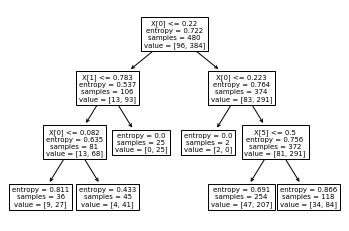

In [43]:
tree.plot_tree(model)

In [50]:
df=pd.Series(pred).value_counts()

In [51]:
df

1.0    120
dtype: int64